# Chapter 2 - End-to-End Machine Learning Project
 in this notebook we will predict median house values using features provided in *California Housing Prices* data set.

In [1]:
import os
import tarfile
import urllib

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

We set up this next function using matplotlib to save the images we create to a seperate folder in an organized manner.</br>
This function will be used throughout the notebook.

In [2]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGE_PATH = os.path.join(PROJECT_ROOT_DIR, "Images", CHAPTER_ID)

# Create the directory for saving images
os.makedirs(IMAGE_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    """Save the figure using pyplot's savefig() function and the specified parameters"""
    path = os.path.join(IMAGE_PATH, fig_id + "." + fig_extension)
    print("saveing figure " + fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Getting the data:
We download the data using a small python function and use another function to extract and read the downloaded file into a pandas's DataFrame object.</br>

In [3]:
# These constants are used to specify differenc paths to put files in
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    """Fetch the data from the given url, extract it and save it to a given path"""
    
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

In [5]:
def load_housing_data(housing_path=HOUSING_PATH):
    """Load the data from the csv file to a pandas' DataFrame"""
    
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data()

## Taking a quick look at the data structure:
Just get a bit familiarized with the overall structure of the data we are dealing with without getting into much detail.

In [7]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


info() method is useful in particular to view the total number of rows, each attribute's type and the number of nonnull values:

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There. Now we know that "total_bedrooms" attributes has some null values in it, so look out!</br>
Remember that "ocean_proximity" is a categorical attributes. Now let's use the value_counts() method to know more about the only attribute of type *object*.

In [9]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

The describe() method shows us a summery of all numerical attributes:

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Another quick way to get a feel of the type of data you are working with is to plot a histogram for each numerical attribute. hist() method can help us with that:

saveing figure attribute_histogram_plots


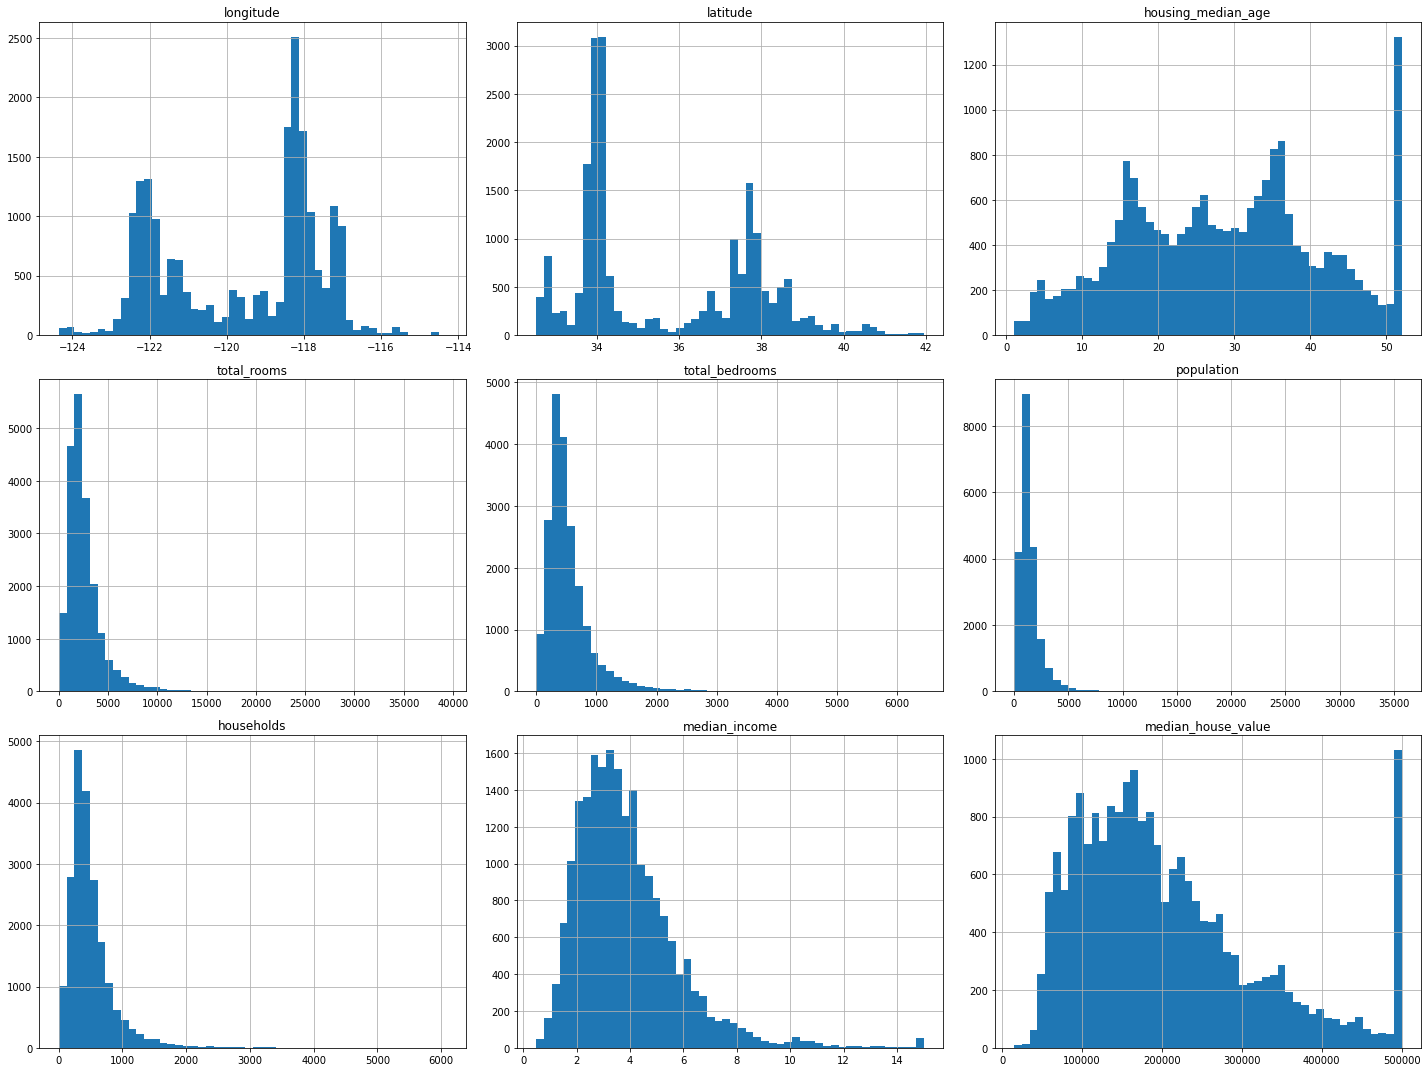

In [11]:
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

The above historgrams tell us that:
1. median income is scaled and capped at 15
2. housing median age and median house values are also capped to 500000 (since median_house_value is your label, if you care about amounts greater than 500k then you must deal with this one)
3. attributes have very different scales
4. many histograms are *tail-heavy*; meaning they extend much more to the right side than to the left.

## Create a test set:
It is important to dedicate a portion of you data to a test set right now and not look at it untill your model is final. This step also prevents "data snooping".

Here's a good way to create a random test set from scratch:

In [12]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(test_ratio * len(data))
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
train_set, test_set = split_train_test(housing, 0.2)
print("train length: ", len(train_set))
print("test length: ", len(test_set))

train length:  16512
test length:  4128


And here's a much easier way to do it with the help of scikit-learn:

In [14]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [15]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


But a lot of the times a "random" test set just doesn't cut it.</br>
Take a closer look at the "median_income" attribute:

<AxesSubplot:>

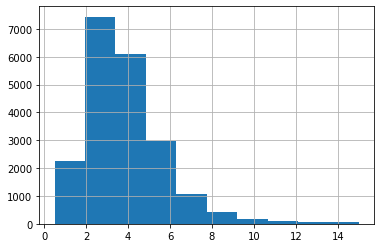

In [16]:
housing["median_income"].hist()

In [17]:
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins=[0, 1.5, 3, 4.5, 6, np.inf],
                              labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

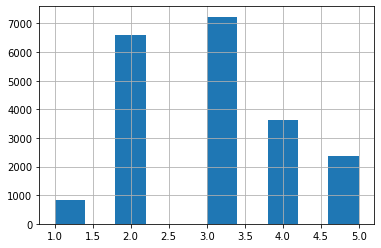

In [18]:
housing["income_cat"].hist()

As you can see in the above figure the median income is distributed in an uneven manner among different price ranges, therefore a simple random test set is not enough. We need a test set *representative* of all the attributes according to their distribution.</br>To gather such a test set we use scikit-learn's StartifiedShuffleSplit:

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [20]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set) # is equal to the ratio in all the data (prev figure)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

let's Compare how close our random and stratified set are to the real data

In [21]:
def income_cat_proportion(data):
    return data["income_cat"].value_counts() / len(data)


train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall" : income_cat_proportion(housing),
    "Stratified" : income_cat_proportion(strat_test_set),
    "Random" : income_cat_proportion(test_set)
}).sort_index()
compare_props["Rand %error"] = (compare_props["Random"] / compare_props["Overall"]) * 100 - 100
compare_props["Strat %error"] = (compare_props["Stratified"] / compare_props["Overall"]) * 100 - 100

In [22]:
compare_props

,Overall,Stratified,Random,Rand %error,Strat %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


In [23]:
# removing income_cat attribute again so that data is back to how it was before

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Discover and visualize the data:
Remember to always create a copy of the train set to work with, without harming the training set.
if you have a very large training data then you might want to sample an exploration set.

In [24]:
# make a copy
housing = strat_train_set.copy()

Geographical information are always a good idea for a scatterplot:

saveing figure bad_visualization_plot


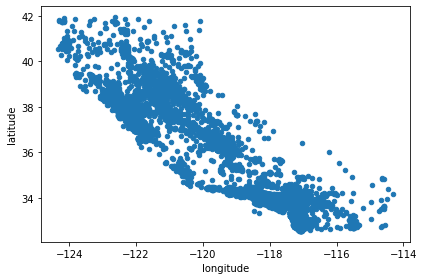

In [25]:
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

Let's improve on it:

saveing figure better_visualization_plot


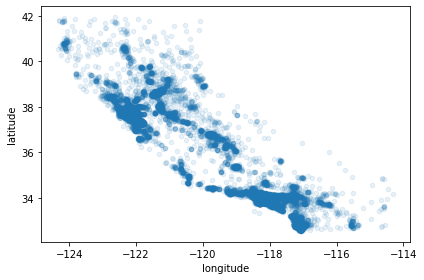

In [26]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

We can do better:

saveing figure housing_price_scatterplot


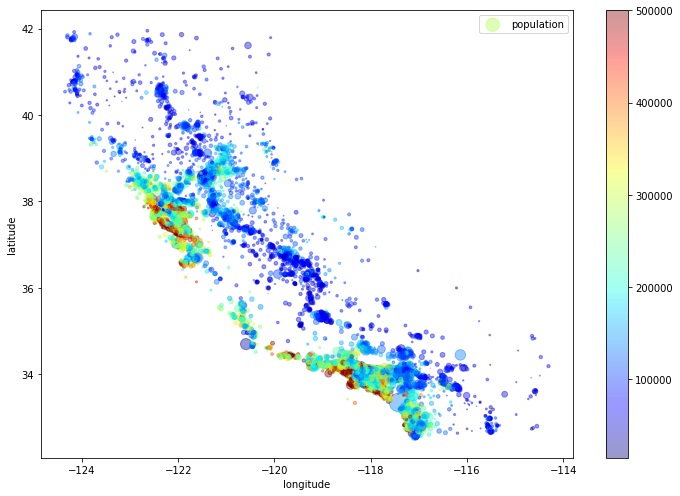

In [27]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c=housing["median_house_value"], cmap="jet", colorbar=True,
            sharex=False)
plt.legend()
save_fig("housing_price_scatterplot")

Get ready for the ultiamte scatterplot:</br>
we're gonna put our current scatterplot on top of a map of California! The better the visualization the more we gain from it.

In [28]:
# downloading the .png of CA
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading " + filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(IMAGE_PATH, filename))

('.\\Images\\end_to_end_project\\california.png',
 <http.client.HTTPMessage at 0x26b43439340>)

saveing figure california_housing_prices_plot


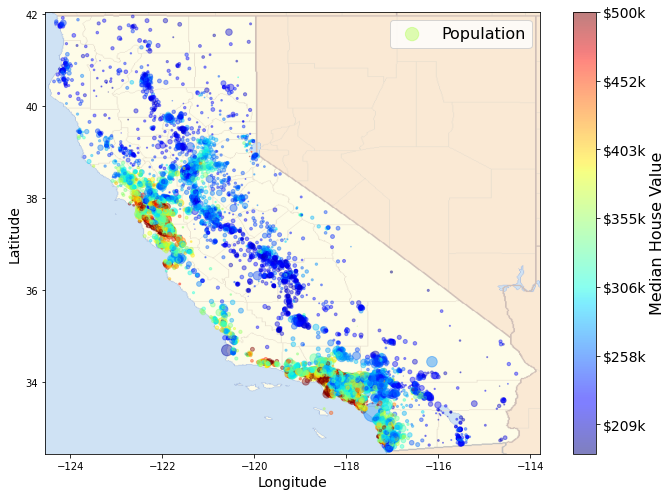

In [29]:
    import matplotlib.image as mpimg
    california_img = mpimg.imread(os.path.join(IMAGE_PATH, filename))
    ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                      s=housing['population']/100, label="Population",
                      c="median_house_value", cmap=plt.get_cmap("jet"),
                      colorbar=False, alpha=0.4)
    plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
              cmap=plt.get_cmap("jet"))
    plt.ylabel("Latitude", fontsize=14)
    plt.xlabel("Longitude", fontsize=14)
    
    prices = housing["median_house_value"]
    tick_values = np.linspace(prices.min(), prices.max(), 11)
    cbar = plt.colorbar(ticks=tick_values/prices.max())
    cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
    cbar.set_label('Median House Value', fontsize=16)
    
    plt.legend(fontsize=16)
    save_fig("california_housing_prices_plot")
    plt.show()

Since our data set is fairly small we can also very easily compute the *standard correlation coefficient* for all the attributes to gain more insight.</br>
pandas' corr() method takes care of that:

In [30]:
corr_matrix = housing.corr()

Since "median_house_value" is such an important attribute for us, let's check out how much each attribute correlates with it:

In [31]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

Don't forget that correlation coefficient only measures linear crrelation and not nonlinear relationships.

And here's another way to check for correlation between attributes in a visual way is to use pandas' scatter_plot() function:

saveing figure scatter_matrix_plot


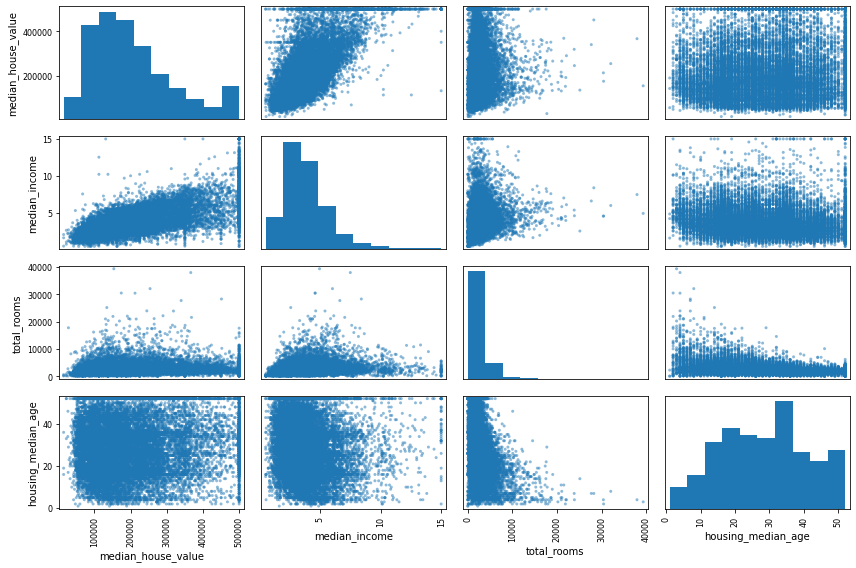

In [32]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Let's take a look at median income. It looks promising:

saveing figure income_vs_house_value_scatterplot


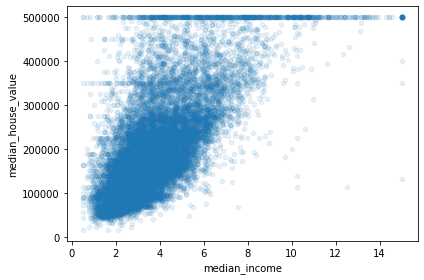

In [33]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
save_fig("income_vs_house_value_scatterplot")

It's clear that:
1. there is an upward trend between the two attributes.
2. there are multiple price caps at 500k, 450k, 350k and maybe one at 280k. We migh have to remove the corresponding districts to prevent our algorithm from learning to reproduce such results.

Combining attributes is one of the best ways to improve an algorithm's performance. We can always try to come up with new features to learn from. Now let's create a few:

In [34]:
# Attribute comination
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [35]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

apperantly all the three combined attributes work well for us and have good correlations with median house value!

## Data cleaning:
In this step we deal with missing values, feature scaling, categorical attributes, transformers, pipelines and more!

First things first: Let's seperate our training data features from our training data labels:

In [36]:
housing = strat_train_set.drop("median_house_value", axis=1)    # drop labels
housing_labels = strat_train_set["median_house_value"].copy()    # make a copy of labels in a new DF

Let's view some of the rows with missing values:

In [37]:
sample_incomplete_rows = housing[housing.isna().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


One way to deal with these missing values is to set them to the median of all the other values of that attribute:

In [38]:
# setting missing values to median

# manual way
# median = housing["total_bedrooms"].median()   # computing the median of the "total_bedrooms" to put in missing places
# housing["total_bedrooms"].fillna(median, inpalce=True)

# using scikit libraries
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

housing_num = housing.drop("ocean_proximity", axis=1)    # creating a table with only numerical values (to compute median)

imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [39]:
# check that the values are the same
print(imputer.statistics_)
print(housing_num.median().values)

[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]
[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]


In [40]:
X = imputer.transform(housing_num)

In [41]:
# transform X from a numpy array to a DF
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                        index=housing_num.index)

In [42]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


Handling text categorical attributes is next. Let's view some to get a feel of what data we're dealing with:

In [43]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


Using encoders is one of the most common ways to handle these attributes. The only problem is that the ML algorithm might think that there's a relation among the numbers assigned to each category (e.g closer numbers represent a close relationship between the attributes, which is obviously not the case here). Let's check out a simple encoder anyway:

In [44]:
# ordinary encoder
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
print(housing_cat_encoded[:10])

print(ordinal_encoder.categories_)

[[0.]
 [0.]
 [4.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


A *OneHotEncoder* is the solution to the above mentioned problem. This encoder creates one binary attribute per category which can be 1(hot) or 0(cold), preventing the algorithm to find much of a pattern among these values. Just remember that the function's output is a scipy object which you can later convert to a numpy array (but it takes a lot of space - too many zeros!).

In [45]:
# 1 hot encoder
from sklearn.preprocessing import OneHotEncoder

oh_encoder = OneHotEncoder()
housing_cat_1hot = oh_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [46]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [47]:
# other way to get np array 
oh_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = oh_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [48]:
oh_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

There is another way to deal with categorical attributes that's called "embedding". It's a part of representational learning, which we'll learn about later on!

We are able to create our own custom transformers that are compatibale with scikit-learn:</br>
To do so, you should implement theree methods: fit()(returning self), transform() and fit_transform().</br>
You can get the last one for free if you use TransformerMixin as a base class. adding BaseEstimator as another base class and avoiding args and kargs gives you the get_params() and set_params() method as well that will be usefull for automatic hyperparameter tuning!

In [49]:
from sklearn.base import BaseEstimator, TransformerMixin

col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, housholds_ix = [
    housing.columns.get_loc(c) for c in col_names
]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):    # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, housholds_ix]
        population_per_household = X[:, population_ix] / X[:, housholds_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)    # we use .values because X[:, rooms_ix] is a np array

In [50]:
# convert back to DF
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns = list(housing.columns) + ["rooms_per_household", "population_per_household"],
    index = housing.index)

housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,4.625369,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,6.00885,2.707965
14650,-117.2,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,4.225108,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,5.232295,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,4.50581,3.047847


Using pipelines is always a good idea. you can also use your custom transformers in them. (more details on calling fit() and fit_transform() are in the book.

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [52]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

scikit-learn provides ColumnTransformer which can handle both categorical and numercial attributes. It's pretty straightforward to use:

In [53]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [54]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [55]:
housing_prepared.shape

(16512, 16)

## Select and train model:
In this exciting step we train a number of different models and evaluate their performance:

**Linear Regression:**

In [56]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [57]:
some_data = housing.iloc[:5]
some_labels = housing_labels[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions: ", lin_reg.predict(some_data_prepared))
print("Labels: ", list(some_labels))

Predictions:  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [58]:
# lin reg RSME
from sklearn.metrics import mean_squared_error

lin_predictions = lin_reg.predict(some_data_prepared)
lin_mse = mean_squared_error(lin_predictions, some_labels)
lin_rsme = np.sqrt(lin_mse)
lin_rsme

46578.63831786732

**Decision tree:**

In [59]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [60]:
tree_predictions = tree_reg.predict(some_data_prepared)
tree_mse = mean_squared_error(tree_predictions, some_labels)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

**Fine tune the model:** Although It costs much more, using a cross validation method is a much better way to evaluate the model. scikit-learn's K-fold cross validation helps us with that.</br>
Remember that it takes a utility function (greater=better) not a cost function (lower=better) so the scoring function gives us the opposite of MSE.

In [61]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [62]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

display_scores(tree_rmse_scores)

Scores:  [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
Mean:  71407.68766037929
Standard deviation:  2439.4345041191004


In [63]:
pd.Series(scores).describe()

count    1.000000e+01
mean    -5.105009e+09
std      3.689090e+08
min     -5.713114e+09
25%     -5.203346e+09
50%     -5.032134e+09
75%     -4.937248e+09
max     -4.469613e+09
dtype: float64

In [64]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean:  69052.46136345083
Standard deviation:  2731.6740017983498


**Random Forest:**

In [74]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
               scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores:  [49319.37630888 47400.98678667 49693.731355   52411.88972296
 49471.33804317 53300.90683748 48512.24366133 47871.94747433
 53125.62427483 50282.06348371]
Mean:  50139.01079483586
Standard deviation:  2017.4854052914604


**Support Vector Machine:**

In [66]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
svm_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, svm_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111094.6308539982

Fine tuning the hyperparameters can be done using GridSearchCV and the much costlier RandomizedSearchCV:

In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [68]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [69]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

Here's the score of each hyperparameter combination tested during the grid search:

In [70]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63669.11631261028 {'max_features': 2, 'n_estimators': 3}
55627.099719926795 {'max_features': 2, 'n_estimators': 10}
53384.57275149205 {'max_features': 2, 'n_estimators': 30}
60965.950449450494 {'max_features': 4, 'n_estimators': 3}
52741.04704299915 {'max_features': 4, 'n_estimators': 10}
50377.40461678399 {'max_features': 4, 'n_estimators': 30}
58663.93866579625 {'max_features': 6, 'n_estimators': 3}
52006.19873526564 {'max_features': 6, 'n_estimators': 10}
50146.51167415009 {'max_features': 6, 'n_estimators': 30}
57869.25276169646 {'max_features': 8, 'n_estimators': 3}
51711.127883959234 {'max_features': 8, 'n_estimators': 10}
49682.273345071546 {'max_features': 8, 'n_estimators': 30}
62895.06951262424 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.176157539405 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.40652318466 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52724.9822587892 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [71]:
pd.DataFrame(grid_search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.043454,0.004680,0.000000,0.000000,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.837622e+09,-4.147108e+09,...,-4.053756e+09,1.519591e+08,18,-1.064113e+09,-1.105142e+09,-1.116550e+09,-1.112342e+09,-1.129650e+09,-1.105559e+09,2.220402e+07
1,0.146725,0.004098,0.006011,0.003351,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.047771e+09,-3.254861e+09,...,-3.094374e+09,1.327062e+08,11,-5.927175e+08,-5.870952e+08,-5.776964e+08,-5.716332e+08,-5.802501e+08,-5.818785e+08,7.345821e+06
2,0.439446,0.003447,0.019645,0.000803,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.689185e+09,-3.021086e+09,...,-2.849913e+09,1.626875e+08,9,-4.381089e+08,-4.391272e+08,-4.371702e+08,-4.376955e+08,-4.452654e+08,-4.394734e+08,2.966320e+06
3,0.072094,0.003107,0.000401,0.000802,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.730181e+09,-3.786886e+09,...,-3.716847e+09,1.631510e+08,16,-9.865163e+08,-1.012565e+09,-9.169425e+08,-1.037400e+09,-9.707739e+08,-9.848396e+08,4.084607e+07
4,0.234339,0.004926,0.005209,0.004315,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.666283e+09,-2.784511e+09,...,-2.781618e+09,1.268607e+08,8,-5.097115e+08,-5.162820e+08,-4.962893e+08,-5.436192e+08,-5.160297e+08,-5.163863e+08,1.542862e+07


We can compute how confident we are in our output using *confidence interval* (look up the formula).</br>
For example we can get a 95% confidence interval for the test RMSE (page 80 of the book).

## Full pipeline:
We can still improve our pipeline:

In [77]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([210644.60459286, 317768.80697211, 210956.43331178,  59218.98886849,
       189747.55849879])

## joblib
you can use joblib to save your models:

In [78]:
my_model = full_pipeline_with_predictor

In [79]:
import joblib
joblib.dump(my_model, "my_model.pkl")
#...
my_model_loaded = joblib.load("my_model.pkl")

Let's improve our SVM model's hyperparameters with GridSearchCV because why not?

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'kernel': ['linear'], 'C': [2, 5, 10, 50, 100, 500, 1000]},
    {'kernel': ['rbf'], 'C':[2, 5, 10, 50, 100, 500, 1000],
     'gamma': [.01, .1, .5, 1, 5, 10]}
]

grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring="neg_mean_squared_error", verbose=2)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END .................................C=2, kernel=linear; total time=   5.0s
[CV] END .................................C=2, kernel=linear; total time=   5.1s
[CV] END .................................C=2, kernel=linear; total time=   5.2s
[CV] END .................................C=2, kernel=linear; total time=   5.0s
[CV] END .................................C=2, kernel=linear; total time=   5.0s
[CV] END .................................C=5, kernel=linear; total time=   5.0s
[CV] END .................................C=5, kernel=linear; total time=   5.0s
[CV] END .................................C=5, kernel=linear; total time=   5.2s
[CV] END .................................C=5, kernel=linear; total time=   4.9s
[CV] END .................................C=5, kernel=linear; total time=   5.0s
[CV] END ................................C=10, kernel=linear; total time=   4.9s
[CV] END ................................C=10, 

[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   9.4s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   9.4s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   9.5s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   9.5s
[CV] END ........................C=10, gamma=0.5, kernel=rbf; total time=   9.2s
[CV] END ........................C=10, gamma=0.5, kernel=rbf; total time=   9.2s
[CV] END ........................C=10, gamma=0.5, kernel=rbf; total time=   9.1s
[CV] END ........................C=10, gamma=0.5, kernel=rbf; total time=   9.2s
[CV] END ........................C=10, gamma=0.5, kernel=rbf; total time=   9.1s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   9.1s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   9.1s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   9.1s
[CV] END ...................

In [ ]:
svm_rsme = np.sqrt(-grid_searchrchsearch.best_score_)
svm_rsme